In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import openpyxl
from jupyter_dash import JupyterDash
from dash import dcc, html
from dash import html

pd.set_option('display.max_rows', None)

from dash.dependencies import Output, Input
from dash.exceptions import PreventUpdate
G3_colour = "#6DA9E4"
G2_colour = "#F7D060"
G1_colour = "#917FB3"
GR_colour = "#98D8AA"
ECD_colour = "#FF6D60"

In [43]:
c22 = pd.read_csv("Results By Year/All22.csv")

file_path = "Results By Year/20230913- Children Database  - English Main.xlsx"
sheet_name = "Children Results "
c23 = pd.read_excel(file_path, sheet_name=sheet_name)

# Display the first few rows of the DataFrame
c23.shape
children = c23.copy()

/Users/jimmckeown/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning:

Unknown extension is not supported and will be removed



In [44]:
# children = children_all[children_all['Jan - Listen First Sound'].notna() & children_all['June - Listen First Sound'].notna()].copy()

# children = children[children['City'] == 'Gqeberha'].copy()
# children = children[children['Schools'] != 'St Augustines'].copy()

children['Jan - Total'] = children[['Jan - Listen First Sound', 'Jan - Listen Word','Jan - Phonics', 'Jan - Blends', 'Jan - Sight Words',
                                  'Jan - Read Sentences', 'Jan - Read Story', 'Jan - Story Comprehension',
                                  'Jan - Written Letters', 'Jan - Write Name', 'Jan - Write CVCs',
                                  'Jan - Write Sentences']].sum(axis=1,min_count=1)
children['June - Total'] = children[['June - Listen First Sound',
       'June - Listen Word','June - Phonics', 'June - Blends', 'June - Sight Words',
                                  'June - Read Sentences', 'June - Read Story', 'June - Story Comprehension',
                                  'June - Written Letters', 'June - Write Name', 'June - Write CVCs',
                                  'June - Write Sentences']].sum(axis=1,min_count=1)
children['June - Listen First Sound Improvement'] = children['June - Listen First Sound'] - children['Jan - Listen First Sound']
children['June - Listen Word Improvement'] = children['June - Listen Word'] - children['Jan - Listen Word']
children['June - Phonics Improvement'] = children['June - Phonics'] - children['Jan - Phonics']
children['June - Written Letters Improvement'] = children['June - Written Letters'] - children['Jan - Written Letters']
children["Jan - Sounds Total"] =  children["Jan - Listen First Sound"] + children["Jan - Listen Word"]
children["June - Sounds Total"] =  children["June - Listen First Sound"] + children["June - Listen Word"]
children["June - Sounds Total Improvement"] = children["June - Sounds Total"] - children["Jan - Sounds Total"]
children["June - Blends Improvement"] = children["June - Blends"] - children["Jan - Blends"]
children["June - Read Sentences Improvement"] = children["June - Read Sentences"] - children["Jan - Read Sentences"]
children["June - Read Story Improvement"] = children["June - Read Story"] - children["Jan - Read Story"]
children["June - Sight Words Improvement"] = children["June - Sight Words"] - children["Jan - Sight Words"]
children["June - Write Sentence Improvement"] = children["June - Write Sentences"] - children["Jan - Write Sentences"]
children["June - Write CVCs Improvement"] = children["June - Write CVCs"] - children["Jan - Write CVCs"]
children["June - Total Improvement"] = children["June - Total"] - children["Jan - Total"]
# Sounds and Phonics Total is 49
children["Jan - Sounds and Phonics"] = children["Jan - Listen First Sound"] + children["Jan - Listen Word"] + children['Jan - Phonics']
# Reading total is 128
children["Jan - Reading"] = children["Jan - Blends"] + children["Jan - Sight Words"] + children['Jan - Read Sentences'] + children["Jan - Read Story"] + children["Jan - Story Comprehension"]
# Writing total is 87
children["Jan - Writing"] = children['Jan - Written Letters'] + children["Jan - Write CVCs"] + children["Jan - Write Sentences"]
# Sounds and Phonics Total is 49
children["June - Sounds and Phonics"] = children["June - Listen First Sound"] + children["June - Listen Word"] + children['June - Phonics']
# Reading total is 128
children["June - Reading"] = children["June - Blends"] + children["June - Sight Words"] + children['June - Read Sentences'] + children["June - Read Story"] + children["June - Story Comprehension"]
# Writing total is 87
children["June - Writing"] = children['June - Written Letters'] + children["June - Write CVCs"] + children["June - Write Sentences"]

children["June - Sounds and Phonics Improvement"] = children["June - Sounds and Phonics"] - children["Jan - Sounds and Phonics"]
children["June - Reading Improvement"] = children["June - Reading"] - children["Jan - Reading"]
children["June - Writing Improvement"] = children["June - Writing"] - children["Jan - Writing"] 

improvement_columns = ["June - Listen First Sound Improvement","June - Listen Word Improvement", "June - Phonics Improvement","June - Blends Improvement", "June - Sight Words Improvement", "June - Read Sentences Improvement", "June - Read Story Improvement", "June - Written Letters Improvement", "June - Write CVCs Improvement", "June - Write Sentence Improvement", "June - Total Improvement" ]

primary = children[children['Grade'] != 'PreR']
primary_on = primary[primary['On The Programme'] == 'Yes']

ecd = children[children['Grade'] == 'PreR']
ecd_on = ecd[ecd['On The Programme'] == 'Yes']

# Functions

In [79]:
def sessions_per_lc():
    primary = children[children['Grade'] != 'PreR']
    primary_on = primary[primary['On The Programme'] == 'Yes']
    return primary_on.groupby(['School', 'LC Name'])['Total Sessions'].sum().sort_values(ascending=False)

def sessions_per_grade_primary_top10():
    return primary_on.groupby(['School', 'Grade'])['Total Sessions'].mean().sort_values(ascending=False).head(10)

def sessions_per_grade_primary_bottom10():
    return primary_on.groupby(['School', 'Grade'])['Total Sessions'].mean().sort_values(ascending=True).head(10)

def sessions_per_lc_top20():
    return primary_on.groupby(['LC Name', 'School'])['Total Sessions'].mean().sort_values(ascending=False).head(20)

def sessions_per_lc_bottom20():
    return primary_on.groupby(['LC Name', 'School'])['Total Sessions'].mean().sort_values(ascending=True).head(20)

def sessions_per_ecd():
    return ecd_on.groupby(['School', 'Grade'])['Total Sessions'].mean().sort_values(ascending=False)

def sessions_per_school():
    return primary_on.groupby(['School', 'Grade'])['Total Sessions'].mean().sort_values(ascending=False)

def sessions_per_lc_ecd_top20():
    return ecd_on.groupby(['LC Name', 'School'])['Total Sessions'].mean().sort_values(ascending=False).head(20)
    
def sessions_per_lc_ecd_botton20():
    return ecd_on.groupby(['LC Name', 'School'])['Total Sessions'].mean().sort_values(ascending=True).head(20)

def children_on_programme_chart():
    kids_on_programme = ecd_on.groupby('School')['Mcode'].count().reset_index(name="Num of Children").sort_values("Num of Children", ascending=False)

    # Plot the sorted data using Plotly
    fig = px.bar(kids_on_programme,
                 y='Num of Children',
                 x='School',
                 title='Number of Children on Programme',
                 template='plotly')

    return fig.show()

def children_on_programme_stacked_chart()
    kids_on_programme = primary_on.groupby(['School', 'Grade'])['Mcode'].count().reset_index(name="Num of Children").sort_values("Num of Children", ascending=False)

    # Plot the sorted data using Plotly
    fig = px.bar(kids_on_programme,
                 y='Num of Children',
                 x='School',
                 color='Grade',
                 title='Number of Children on Programme',
                 template='plotly')

    return fig.show()

def sessions_per_child_primary():
    filtered_children = children[(children['On The Programme'] == 'Yes') & (children['Grade'] != "PreR")]
    grouped = filtered_children.groupby('School')['Total Sessions'].mean().sort_values(ascending=False).reset_index()

    # Plot the sorted data using Plotly
    fig = px.bar(grouped,
                 y='Total Sessions',
                 x='School',
                 title='Primary School: Average Sessions per Child',
                 template='plotly')

    return fig.show()

def sessions_per_child_ecd():
    filtered_children = children[(children['On The Programme'] == 'Yes') & (children['Grade'] == "PreR")]
    grouped = filtered_children.groupby('School')['Total Sessions'].mean().sort_values(ascending=False).reset_index()

    # Plot the sorted data using Plotly
    fig = px.bar(grouped,
                 y='Total Sessions',
                 x='School',
                 title='ECDCs: Average Sessions per Child',
                 template='plotly')

    return fig.show()

def total_sessions_ecd():
    filtered_children = children[(children['On The Programme'] == 'Yes') & (children['Grade'] == "PreR")]
    grouped = filtered_children.groupby('School')['Total Sessions'].sum().sort_values(ascending=False).reset_index()

    # Plot the sorted data using Plotly
    fig = px.bar(grouped,
                 y='Total Sessions',
                 x='School',
                 title='ECDCs: Total Sessions in 2023',
                 template='plotly')

    return fig.show()

def total_sessions_by_ecd_lc():
    ecd = children[children['Grade'] == 'PreR']
    ecd_on = ecd[ecd['On The Programme'] == 'Yes']
    return ecd_on.groupby(['School', 'LC Name'])['Total Sessions'].sum().sort_values(ascending=False)



SyntaxError: expected ':' (113219915.py, line 42)

# ON PROGRAMME FLAG

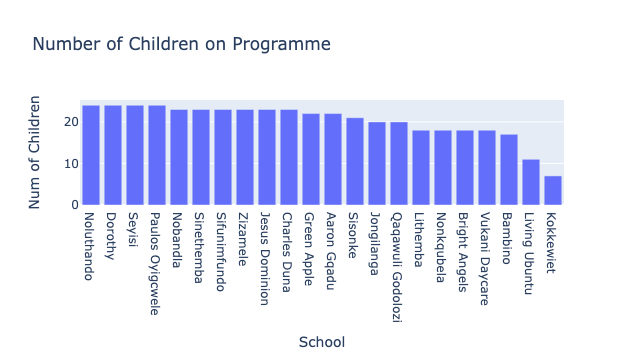

In [75]:
def children_on_programme_chart():
    kids_on_programme = ecd_on.groupby('School')['Mcode'].count().reset_index(name="Num of Children").sort_values("Num of Children", ascending=False)

    # Plot the sorted data using Plotly
    fig = px.bar(kids_on_programme,
                 y='Num of Children',
                 x='School',
                 title='Number of Children on Programme',
                 template='plotly')

    return fig.show()

children_on_programme_chart()

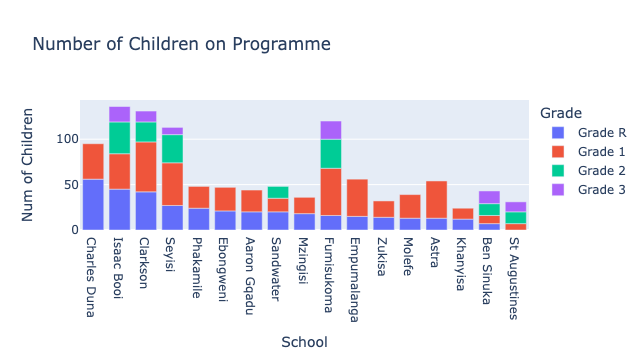

In [46]:
kids_on_programme = primary_on.groupby(['School', 'Grade'])['Mcode'].count().reset_index(name="Num of Children").sort_values("Num of Children", ascending=False)

# Plot the sorted data using Plotly
fig = px.bar(kids_on_programme,
             y='Num of Children',
             x='School',
             color='Grade',
             title='Number of Children on Programme',
             template='plotly')

fig.show()

### Checking On The Programme Flag
##### Sessions are greater than 10, but Flag says No. Confirm if these kids really should be a 'Yes'

In [47]:
df = children[(children['Total Sessions'] > 10) & (~children['On The Programme'].isin(['Yes', 'Graduated']))]
# df.shape[0]
df[['School', 'Full Name', 'LC Name', 'On The Programme', 'Total Sessions']]

,School,Full Name,LC Name,On The Programme,Total Sessions
1072,Lithemba,Stemele Siphahle,NaN,"No, Left",11.0
1456,Lithemba,Luwana Yalanathi,NaN,"No, Left",12.0
1542,Lithemba,Mkatshane Chiome,NaN,"No, Left",45.0
1680,St Augustines,Katizandima Lindiwe,NaN,No,14.0
1890,Isaac Booi,Silwana Onje,NaN,"No, Left",14.0
1923,Isaac Booi,Solani Lelothando,NaN,"No, Left",25.0
2719,Qaqawuli Godolozi,Ngxabasi Iminathi,NaN,"No, Left",28.0
2750,Sifunimfundo,Chimanga Tapfuma,NaN,"No, Left",17.0
2789,Sisonke,Tsitsa Lelona,NaN,No,18.0
3067,Dorothy,Ngobozi Nkosi,NaN,"No, Left",27.0


##### Sessions are less than 10, but Flag says Yes. Confirm if these kids really are on the programme.

In [48]:
df = children[(children['Total Sessions'] < 10) & (children['On The Programme'] == 'Yes') & (children['City'] == 'Gqeberha') & (~children['School'].isin(['Astra', 'Molefe', 'Empumalanga']))]
df.shape[0]
# df[['School', 'Full Name', 'Grade', 'LC Name', 'On The Programme', 'Total Sessions']]

15

### Kids with flag NOT on the programme, but we assessed as if they were

In [49]:
dfnew = children[(children['On The Programme'] == 'No') & (children['June - Listen First Sound'].notna())]
dfnew['Mcode'].count()
# dfnew[['Full Name', 'School','On The Programme', 'June - Listen First Sound']]

54

### Checking % of Children with X Sessions

In [50]:
# from jupyter_dash import JupyterDash
# from dash import dcc, html, Input, Output, PreventUpdate
# import pandas as pd
# import plotly.express as px

# Assuming you have the 'children' DataFrame loaded here

app = JupyterDash(__name__)

app.layout = html.Div([
    html.H2(id="header"),
    dcc.Slider(
        id="session_limit",
        marks={10: '10', 20: '20', 30: '30', 40: '40'},
        min=10,
        max=40,
        step=5,
        value=10
    ),
    dcc.Graph(id="graph"),
])

@app.callback(
    Output("header", "children"),
    Output("graph", "figure"),
    Input("session_limit", "value")
)
def plot_rev_scatter(session_limit):
    if session_limit is None:
        raise PreventUpdate
        
    children_on = children[children['On The Programme'] == 'Yes']
    filtered_children = children[(children['Total Sessions'] < session_limit) & (children['On The Programme'] == 'Yes')]
    grouped = filtered_children.groupby('School')['Mcode'].count() / children_on.groupby('School')['Mcode'].count() * 100
    grouped = grouped.sort_values(ascending=False).reset_index().rename(columns={'Mcode': 'Percentage'})
    
    fig = px.bar(
        grouped,
        y='Percentage',
        x='School',
        title=f"Percent of Children With Less Than {session_limit} Sessions",
        labels={'Total Sessions': 'Average Total Sessions', 'School': 'School'},
        template='plotly'
    )

    header = f"Percent of Children With Less Than {session_limit} Sessions"
    return header, fig

if __name__ == "__main__":
    app.run_server(mode="inline", port=9271, debug=True)


# SESSIONS

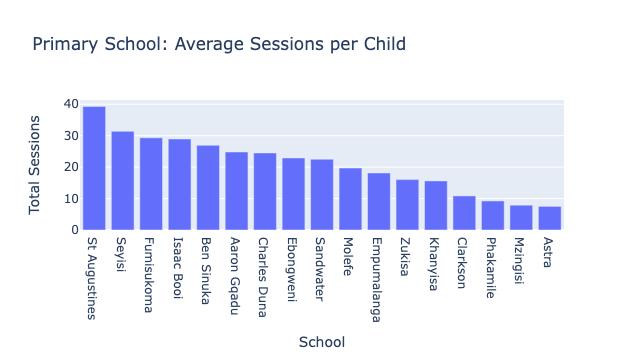

In [51]:
# Group by 'School' and calculate the percentage
def sessions_per_child_primary():
    filtered_children = children[(children['On The Programme'] == 'Yes') & (children['Grade'] != "PreR")]
    grouped = filtered_children.groupby('School')['Total Sessions'].mean().sort_values(ascending=False).reset_index()

    # Plot the sorted data using Plotly
    fig = px.bar(grouped,
                 y='Total Sessions',
                 x='School',
                 title='Primary School: Average Sessions per Child',
                 template='plotly')

    return fig.show()

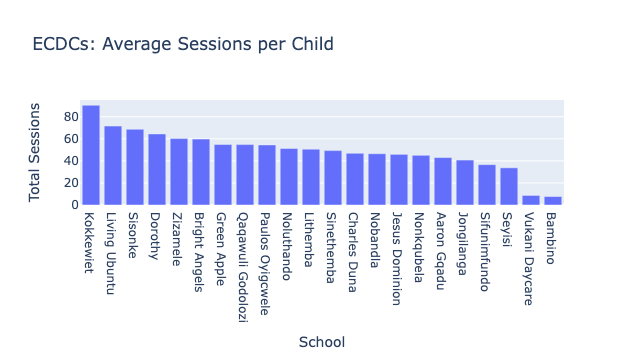

In [52]:
# Group by 'School' and calculate the percentage
filtered_children = children[(children['On The Programme'] == 'Yes') & (children['Grade'] == "PreR")]
grouped = filtered_children.groupby('School')['Total Sessions'].mean().sort_values(ascending=False).reset_index()

# Plot the sorted data using Plotly
fig = px.bar(grouped,
             y='Total Sessions',
             x='School',
             title='ECDCs: Average Sessions per Child',
             template='plotly')

fig.show()

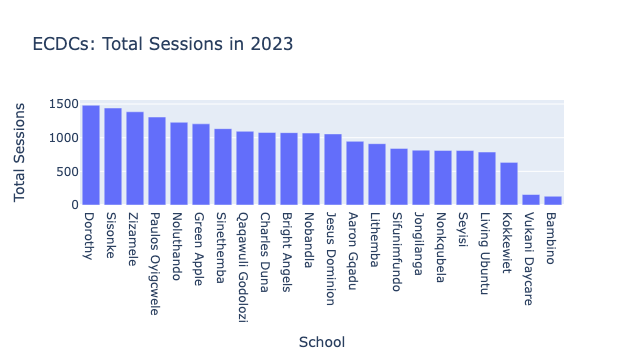

In [53]:
# Group by 'School' and calculate the percentage
filtered_children = children[(children['On The Programme'] == 'Yes') & (children['Grade'] == "PreR")]
grouped = filtered_children.groupby('School')['Total Sessions'].sum().sort_values(ascending=False).reset_index()

# Plot the sorted data using Plotly
fig = px.bar(grouped,
             y='Total Sessions',
             x='School',
             title='ECDCs: Total Sessions in 2023',
             template='plotly')

fig.show()

### Sessions Per Grade (Primary) - Top 10

In [72]:
def sessions_per_grade_primary_top10():
    return primary_on.groupby(['School', 'Grade'])['Total Sessions'].mean().sort_values(ascending=False).head(10)

### Sessions Per Grade (Primary) - Bottom 10

In [55]:
primary_on.groupby(['School', 'Grade'])['Total Sessions'].mean().sort_values(ascending=True).head(10)

School       Grade  
Astra        Grade 1     6.951220
Phakamile    Grade 1     7.666667
Mzingisi     Grade 1     7.722222
             Grade R     8.055556
Astra        Grade R     9.307692
Clarkson     Grade 2     9.954545
Empumalanga  Grade 1    10.756098
Phakamile    Grade R    10.833333
Clarkson     Grade R    10.976190
             Grade 1    11.036364
Name: Total Sessions, dtype: float64

### Sessions per LC (Primary) - Top 20

In [56]:
primary_on.groupby(['LC Name', 'School'])['Total Sessions'].mean().sort_values(ascending=False).head(20)

LC Name                   School       
Sibulele Ngcobo           St Augustines    43.285714
Nokubonga Nguty           St Augustines    39.000000
Masande Tyali             St Augustines    37.750000
Xabiso Xaba               St Augustines    37.625000
Phaphama Kolisi           Seyisi           36.600000
Siphosethu Mlenze         Seyisi           35.909091
Nomathamsanqa Mazoka      Seyisi           35.000000
Sisipho Ntisa             Fumisukoma       35.000000
Thenjiwe Shushu           Seyisi           33.300000
Elam Xalipi               Fumisukoma       33.000000
Esethu Mantakana          Fumisukoma       32.700000
Sisipho Wali              Isaac Booi       32.666667
Sinazo Jwara              Seyisi           32.333333
Nandipha Putela           Fumisukoma       32.300000
Ntombizandile Ngamntwini  Fumisukoma       32.111111
Alizwa Tsili              Seyisi           31.900000
Sinazo Maxaza             Fumisukoma       31.400000
Asenathi Phiri            Seyisi           31.333333
Zimkhi

### Sessions per LC (Primary) - Bottom 20

In [58]:
low_lc = primary_on[primary_on['City'] == 'Gqeberha']
low_lc.groupby(['LC Name', 'School'])['Total Sessions'].mean().sort_values(ascending=True).head(20)

LC Name             School      
Shenaaz Britz       Astra            6.833333
Cheslean Warney     Astra            6.916667
Denise Donay        Astra            7.181818
Jennelee Ruth Noah  Astra            8.454545
Saudah Davids       Astra            8.625000
Lihlumelo Gaba      Molefe          12.222222
Anesipho Budaza     Empumalanga     14.250000
Lisakhanya Mboniso  Molefe          14.500000
Noluthando Kondile  Empumalanga     15.600000
Anathi Nqono        Ebongweni       18.181818
Mihlali Giya        Empumalanga     18.500000
Sibabalwe Ngcobo    Empumalanga     19.583333
Zikhona Blauw       Aaron Gqadu     20.400000
Luphumzo Bassie     Ben Sinuka      21.888889
Anelisa Nowala      Empumalanga     22.416667
Sinazo Njokweni     Charles Duna    22.833333
Onwabile Bebe       Aaron Gqadu     23.333333
Emihle Lucas        Charles Duna    23.333333
Fikiswa Rhayiza     Ebongweni       23.333333
Sinethemba Msizi    Ebongweni       23.916667
Name: Total Sessions, dtype: float64

### Sessions per ECD

In [59]:
ecd_on.groupby(['School', 'Grade'])['Total Sessions'].mean().sort_values(ascending=False)

School             Grade
Kokkewiet          PreR     90.428571
Living Ubuntu      PreR     71.545455
Sisonke            PreR     68.619048
Dorothy            PreR     64.434783
Zizamele           PreR     60.217391
Bright Angels      PreR     59.722222
Green Apple        PreR     54.818182
Qaqawuli Godolozi  PreR     54.750000
Paulos Oyigcwele   PreR     54.458333
Noluthando         PreR     51.208333
Lithemba           PreR     50.611111
Sinethemba         PreR     49.304348
Charles Duna       PreR     46.869565
Nobandla           PreR     46.478261
Jesus Dominion     PreR     45.913043
Nonkqubela         PreR     45.055556
Aaron Gqadu        PreR     43.000000
Jongilanga         PreR     40.750000
Sifunimfundo       PreR     36.565217
Seyisi             PreR     33.708333
Vukani Daycare     PreR      8.666667
Bambino            PreR      7.647059
Name: Total Sessions, dtype: float64

### Sessions per LC (ECD) - Top 20

In [60]:
ecd_on.groupby(['LC Name', 'School'])['Total Sessions'].mean().sort_values(ascending=False).head(20)

LC Name               School           
Zolani Bonani         Kokkewiet            90.428571
Debonice Malan        Living Ubuntu        71.545455
Khanyisa Kuhlane      Sisonke              68.666667
Alizwa Tsili          Sisonke              68.555556
Khanyisa Mini         Dorothy              67.000000
Mahle Sixaso          Zizamele             65.090909
Saneliso Ndlovu       Dorothy              61.636364
Esihle Jona           Bright Angels        61.000000
Phelelwe Nyoka        Green Apple          59.833333
Siphokazi Ncwabeni    Sinethemba           58.833333
Yibanathi Mpumlwana   Bright Angels        58.444444
Chulumanco Boloti     Noluthando           56.166667
Sithenkosi Gcolotela  Zizamele             55.750000
Sisipho Xhamntwana    Paulos Oyigcwele     55.416667
Blessing Muronzi      Qaqawuli Godolozi    55.363636
Siphokazi Soxujwa     Lithemba             54.125000
Akhona Pita           Qaqawuli Godolozi    54.000000
Hazel Khumalo         Paulos Oyigcwele     53.500000
Nwabis

### Sessions per LC (ECD) - Bottom 20

In [61]:
ecd_on.groupby(['LC Name', 'School'])['Total Sessions'].mean().sort_values(ascending=True).head(20)

LC Name               School        
Natolino Takor        Bambino            6.333333
Phelokazi Qwazi       Vukani Daycare     7.555556
Jacquline Jantjies    Bambino            9.125000
Zubenathi Ntshontsho  Vukani Daycare     9.777778
Nosipho Gxasheka      Seyisi            23.000000
Nelisa Zondani        Seyisi            32.333333
Lindokuhle Nobebe     Sifunimfundo      32.833333
Nomathamsanqa Mazoka  Seyisi            36.181818
Phumla Rasmeni        Jongilanga        36.555556
Ntombovuyo Piliso     Sinethemba        38.909091
Ethel Mavaivai        Sifunimfundo      40.636364
Phelisa Mangesi       Nonkqubela        40.750000
Esona Mbanga          Nobandla          41.000000
Lolwethu Vice         Jesus Dominion    42.818182
Sibonokuhle Lugogo    Aaron Gqadu       42.909091
Zintle Majola         Aaron Gqadu       43.090909
Sinovuyo Hlulani      Charles Duna      44.000000
Siyakhiwa Mesele      Jongilanga        44.181818
Thandile Funde        Noluthando        46.250000
Siphesihle Bi

### Standard Deviation of Sessions (Low is good)

In [78]:


plt.figure(figsize=(12,6))
gbo_ecd_on['Total Sessions'].std().sort_values().plot(kind="bar", color=ECD_colour)
plt.title("Session Standard Deviation by ECDC")
plt.xlabel("<-----  Good                  Bad  ----->")

NameError: name 'gbo_ecd_on' is not defined

<Figure size 1200x600 with 0 Axes>

# ASSESSMENTS

### Jan Assessment Percentages


In [63]:
primary = children[children['Grade'] != 'PreR']
primary_on = primary[primary['On The Programme'] == 'Yes']

gbo_primary = children[children['Grade'] != 'PreR'].groupby('School')
gbo_primary_on = primary[primary['On The Programme'] == 'Yes'].groupby('School')

total_children = gbo_primary['Full Name'].count()
total_children_assessed = gbo_primary['Jan - Phonics'].count()

percent_assessed = (total_children_assessed / total_children) * 100


df_assessed = pd.DataFrame({'Number of Children': total_children, 
                          'Number of Children Assessed': total_children_assessed, 
                          'Percentage Assessed': percent_assessed})
df_assessed.sort_values('Percentage Assessed', ascending=False)

,Number of Children,Number of Children Assessed,Percentage Assessed
School,,,
Astra,250,248,99.200000
Charles Duna,265,260,98.113208
Mzingisi,46,45,97.826087
St Augustines,108,105,97.222222
Isaac Booi,547,528,96.526508
Sandwater,52,50,96.153846
Phakamile,171,164,95.906433
Zukisa,34,32,94.117647
Seyisi,358,320,89.385475


### Jan ECD Assessments

In [ ]:
gbo_ecd = children[children['Grade'] == 'PreR'].groupby('School')
gbo_ecd_on = ecd[ecd['On The Programme'] == 'Yes'].groupby('School')

total_children = gbo_ecd_on['Full Name'].count()
total_children_assessed = gbo_ecd_on['Jan - Phonics'].count()

percent_assessed = (total_children_assessed / total_children) * 100


df_assessed = pd.DataFrame({'Number of Children': total_children, 
                          'Number of Children Assessed': total_children_assessed, 
                          'Percentage Assessed': percent_assessed})
df_assessed.sort_values('Percentage Assessed', ascending=False)

### Low Assessment Grades (Under 85%)

In [ ]:
gbo_grade = primary.groupby(['School', 'Grade'])
total_children_grade = gbo_grade['Full Name'].count()
total_children_grade_assessed = gbo_grade['Jan - Total'].count()

percent_assessed_grade = (total_children_grade_assessed / total_children_grade) * 100


df_assessed_grade = pd.DataFrame({'Number of Children': total_children_grade, 
                          'Number of Children Assessed': total_children_grade_assessed, 
                          'Percentage Assessed': percent_assessed_grade})

# df_assessed_grade
df_assessed_grade[df_assessed_grade['Percentage Assessed'] < 85]

### June Assessment Percentages

In [ ]:
#Note in January we are only assessing children on the programme

primary = children[children['Grade'] != 'PreR']
primary_on = primary[primary['On The Programme'] == 'Yes']

gbo_primary = children[children['Grade'] != 'PreR'].groupby('School')
gbo_primary_on = primary[primary['On The Programme'] == 'Yes'].groupby('School')

total_children = gbo_primary_on['Full Name'].count()
total_children_assessed = gbo_primary_on['June - Phonics'].count()

percent_assessed = (total_children_assessed / total_children) * 100


df_assessed = pd.DataFrame({'Number of Children': total_children, 
                          'Number of Children Assessed': total_children_assessed, 
                          'Percentage Assessed': percent_assessed})
df_assessed.sort_values('Percentage Assessed', ascending=False)

### June ECD Assessments

In [ ]:
gbo_ecd = children[children['Grade'] == 'PreR'].groupby('School')
gbo_ecd_on = ecd[ecd['On The Programme'] == 'Yes'].groupby('School')

total_children = gbo_ecd_on['Full Name'].count()
total_children_assessed = gbo_ecd_on['June - Phonics'].count()

percent_assessed = (total_children_assessed / total_children) * 100


df_assessed = pd.DataFrame({'Number of Children': total_children, 
                          'Number of Children Assessed': total_children_assessed, 
                          'Percentage Assessed': percent_assessed})
df_assessed.sort_values('Percentage Assessed', ascending=False)

### Low Assessment Grades

In [ ]:
gbo_grade = primary_on.groupby(['School', 'Grade'])
total_children_grade = gbo_grade['Full Name'].count()
total_children_grade_assessed = gbo_grade['June - Total'].count()

percent_assessed_grade = (total_children_grade_assessed / total_children_grade) * 100


df_assessed_grade = pd.DataFrame({'Number of Children': total_children_grade, 
                          'Number of Children Assessed': total_children_grade_assessed, 
                          'Percentage Assessed': percent_assessed_grade})

# df_assessed_grade
df_assessed_grade[df_assessed_grade['Percentage Assessed'] < 85]

In [ ]:
# Export PDFs of Children Not Assessed - Check This Code
# import os
# import pandas as pd
# from fpdf import FPDF

# # Group by 'Schools' and 'Grade', and filter for records where 'Jan - Total' is NaN
# primary_nan = primary[primary['Jan - Total'].isnull()]
# gbo_school_grade = primary_nan.groupby(['Schools', 'Grade'])

# # Loop through each unique school in the 'Schools' column
# for school in primary_nan['Schools'].unique():
    
#     # Create a PDF for the current school
#     pdf = FPDF()
#     pdf.add_page()
#     pdf.set_font('Arial', 'B', 16)
#     pdf.cell(0, 10, f"List of Children Not Assessed at {school}", 0, 1)
#     pdf.set_font('Arial', '', 12)

#         # Loop through each unique grade for the current school
#     for grade in primary_nan[primary_nan['Schools'] == school]['Grade'].unique():

#         # Get the list of children for the current school and grade
#         children_list = gbo_school_grade.get_group((school, grade))['Full Name'].tolist()

#         # Add the list of children to the PDF
#         pdf.cell(0, 10, f"{grade.upper()}:", 0, 1)
#         for child in children_list:
#             pdf.cell(0, 10, str(child), 0, 1)

#     # Save the PDF for the current school
#     pdf_file_name = f"{school} Children Not Assessed.pdf"
#     pdf.output(pdf_file_name, 'F')

# print(f"{pdf_file_name} saved successfully.")


# CHECKING LCs

In [64]:
program_yes = children[(children['On The Programme'] == 'Yes') & (children['LC Name'] != 'Graduated') ]
lc_program_counts = program_yes.groupby(['LC Name', 'School']).size().reset_index(name="Num of Children").sort_values("Num of Children")
lc_program_counts[~lc_program_counts['Num of Children'].between(8,12)]

,LC Name,School,Num of Children
140,Zolani Bonani,Kokkewiet,7
114,Sisipho Ntisa,Fumisukoma,7
96,Sibulele Ngcobo,St Augustines,7
44,Lathitha Skosana,Clarkson,13


#### Breakdown of LC: Child Ratios

In [65]:
lc_program_counts['Num of Children'].value_counts()

Num of Children
12    61
11    32
10    19
9     15
8     12
7      3
13     1
Name: count, dtype: int64

### Total Sessions by LCs ECDCs

In [66]:
ecd = children[children['Grade'] == 'PreR']
ecd_on = ecd[ecd['On The Programme'] == 'Yes']
ecd_on.groupby(['School', 'LC Name'])['Total Sessions'].sum().sort_values(ascending=False)

School             LC Name             
Sisonke            Khanyisa Kuhlane        824.0
Dorothy            Khanyisa Mini           804.0
Living Ubuntu      Debonice Malan          787.0
Green Apple        Phelelwe Nyoka          718.0
Zizamele           Mahle Sixaso            716.0
Sinethemba         Siphokazi Ncwabeni      706.0
Dorothy            Saneliso Ndlovu         678.0
Noluthando         Chulumanco Boloti       674.0
Zizamele           Sithenkosi Gcolotela    669.0
Paulos Oyigcwele   Sisipho Xhamntwana      665.0
                   Hazel Khumalo           642.0
Kokkewiet          Zolani Bonani           633.0
Nobandla           Nwabisa Mashawa         618.0
Sisonke            Alizwa Tsili            617.0
Qaqawuli Godolozi  Blessing Muronzi        609.0
Charles Duna       Ncumisa Mselani         594.0
Jesus Dominion     Yandisa Ntsumpa         585.0
Noluthando         Thandile Funde          555.0
Bright Angels      Esihle Jona             549.0
                   Yibanathi 

### Total Sessions by LCs Primary

In [70]:
def sessions_per_lc():
    primary = children[children['Grade'] != 'PreR']
    primary_on = primary[primary['On The Programme'] == 'Yes']
    return primary_on.groupby(['School', 'LC Name'])['Total Sessions'].sum().sort_values(ascending=False)

In [71]:
session_per_lc()

School         LC Name                     
Seyisi         Siphosethu Mlenze               395.0
Isaac Booi     Sisipho Wali                    392.0
               Zimkhitha Matole                372.0
Ben Sinuka     Ntlakanipho Ngqondi             367.0
Seyisi         Phaphama Kolisi                 366.0
Sandwater      Marizanne Mzangwa               357.0
Seyisi         Sihle Bunu                      348.0
Isaac Booi     Seluleko Mvabi                  340.0
               Siyamthanda Shevan Palamente    337.0
               Sinethemba Maxwell Mofu         337.0
               Siya Matola                     335.0
Aaron Gqadu    Lithalethu Manga                334.0
Seyisi         Thenjiwe Shushu                 333.0
               Dolly Msizi                     333.0
Fumisukoma     Esethu Mantakana                327.0
               Nandipha Putela                 323.0
Seyisi         Alizwa Tsili                    319.0
Isaac Booi     Sinombulelo Mali                318.0
Se

# RESULTS CHECKS

### First Sound Drop Offs (Primary)
##### (Uncomment .csv if export wanted)

In [ ]:
children[['Full Name', 'School','Grade','Total Sessions','June - Listen First Sound Improvement']].sort_values('June - Listen First Sound Improvement').head(15)
# children[['Full Name', 'School','Grade','Total Sessions','June - Listen First Sound Improvement']].sort_values('June - Listen First Sound Improvement').to_csv("Listen First Sound Checks.csv", index=False)

### Phonics Drop Offs (Primary)
##### (Uncomment .csv if export wanted)

In [ ]:
# children[['Full Name', 'School','Grade','Total Sessions','June - Phonics Improvement']].sort_values('June - Phonics Improvement').to_csv("Phonics Checks.csv", index=False)
children[['Full Name', 'School','Grade','Total Sessions','June - Phonics Improvement']].sort_values('June - Phonics Improvement').head(15)

### Total Drop Offs (Primary)
##### (Uncomment .csv if export wanted)

In [ ]:
primary_check = primary_on[primary_on['June - Listen First Sound'].notna()]
# primary_check[['Full Name', 'School','Grade','Total Sessions','Jan - Total', 'June - Total','June - Total Improvement']].sort_values('June - Total Improvement').to_csv("Total Improvement Checks.csv", index=False)
primary_check[['Full Name', 'School','Grade','Total Sessions','Jan - Total', 'June - Total','June - Total Improvement']].sort_values('June - Total Improvement').head(15)

### Reading Drop Offs (Primary)
##### (Uncomment .csv if export wanted)

In [ ]:
primary_check = primary_on[primary_on['June - Listen First Sound'].notna()]
# primary_check[['Full Name', 'School','Grade','Total Sessions','Jan - Read Story', 'June - Read Story','June - Read Story Improvement']].sort_values('June - Read Story Improvement').to_csv("Reading Improvement Checks.csv", index=False)
primary_check[['Full Name', 'School','Grade','Total Sessions','Jan - Read Story', 'June - Read Story','June - Read Story Improvement']].sort_values('June - Read Story Improvement').head(15)

### All Children: Write Letters but Can't Read
##### (Uncomment .csv if export wanted)

In [80]:
children = children[children['June - Phonics'].notna() & children['June - Written Letters'].notna()]

children['Write_Read_Dif'] = children['June - Written Letters'] - children['June - Phonics']
filtered_children = children[['Full Name', 'School','Grade','Total Sessions','June - Written Letters', 'June - Phonics','Write_Read_Dif']].sort_values('Write_Read_Dif', ascending=False)

# filtered_children.to_csv("Write But Cannot Read Checks.csv", index=False)
filtered_children.head(25)

,Full Name,School,Grade,Total Sessions,June - Written Letters,June - Phonics,Write_Read_Dif
1404,Bhalasane Solulele,Seyisi,Grade 1,32.0,25.0,0.0,25.0
466,Mani Unabantu,Fumisukoma,Grade 2,24.0,24.0,0.0,24.0
442,Ala Aqhama,Isaac Booi,Grade 2,27.0,26.0,6.0,20.0
789,Mlonyeni Kungawo,Green Apple,PreR,44.0,21.0,3.0,18.0
3883,Peter Collin,Sandwater,Grade 1,19.0,18.0,1.0,17.0
766,Dambuza Mivuyo,Fumisukoma,Grade 1,25.0,21.0,4.0,17.0
388,Qeqe Khayone Anothando,Seyisi,Grade 3,NaN,25.0,9.0,16.0
2838,Mtwazi Inaminkosi,Isaac Booi,Grade 1,23.0,23.0,8.0,15.0
3594,Sam Abukhanyise,Charles Duna,Grade 1,21.0,21.0,6.0,15.0
3711,Matomela Qhama,Seyisi,Grade 1,34.0,20.0,5.0,15.0
